# H2HBABBA2250 
### Aim: Build a Machine Learning model to predict the date of payment of an invoice

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading dataset
data=pd.read_csv("H2HBABBA2250.csv")
untouched=data #copy of dataset 
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200785971,SYSCO foundation,2019-07-18 00:00:00,2019.0,1.929571e+09,2019-07-02,20190703,20190702,20190717.0,USD,RV,1.0,NaN,19922.82,20190702.0,NAA8,1.929571e+09,0
1,U001,0200743123,KROGER in,2019-11-15 00:00:00,2019.0,1.930078e+09,2019-10-31,20191101,20191031,20191115.0,USD,RV,1.0,NaN,38332.25,20191031.0,NAA8,1.930078e+09,0
2,U001,0200772595,SAFEW corporation,NaN,2020.0,1.930704e+09,2020-03-25,20200326,20200325,20200409.0,USD,RV,1.0,NaN,73080.87,20200325.0,NAA8,1.930704e+09,1
3,U001,0200769623,WAL-MAR us,2019-04-30 00:00:00,2019.0,1.929168e+09,2019-04-19,20190418,20190419,20190504.0,USD,RV,1.0,NaN,25054.82,20190419.0,NAH4,1.929168e+09,0
4,U001,0200726979,BJ'S corp,2020-02-18 00:00:00,2020.0,1.930470e+09,2020-02-03,20200202,20200203,20200218.0,USD,RV,1.0,NaN,63.48,20200203.0,NAA8,1.930470e+09,0


In [3]:
data.shape
#total rows and columns

(50000, 19)

### Pre-processing
##### i) deleting null , duplicate and throughout-constant values
##### ii) maintaining datatypes suitable for model 
##### iii) creating target values

In [4]:
data.isnull().sum()
#total number of null rows in each columns

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [5]:
data.dropna(how='all', inplace=True)
data.dropna(how='all', axis=1, inplace=True)
data.shape
#deleting null rows and columns

(50000, 18)

In [6]:
i=data.duplicated().sum()
#determines duplicate rows and deleting them
if (i!=0):
    data.drop_duplicates(keep='first', inplace=True)
data.shape

(48776, 18)

In [7]:
#posting_date:date format value 1
#document_create_date: int format value 2
#document_create_date1: int format value 1 
#baseline_create_date: float format value 1
#isOpen: int
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [8]:
pd.to_datetime(data["posting_date"])
#converting to datetime 

0       2019-07-02
1       2019-10-31
2       2020-03-25
3       2019-04-19
4       2020-02-03
           ...    
49995   2020-01-29
49996   2020-01-30
49997   2019-10-03
49998   2019-04-03
49999   2019-09-09
Name: posting_date, Length: 48776, dtype: datetime64[ns]

In [9]:
#checking correlation between baseline_create_date document_create_date.1 document_create_date
col1=data["baseline_create_date"].astype(int)
col2=data["document_create_date.1"]
col3=data["document_create_date"]
col1.corr(col2)#almost similar data

0.9990645700784261

In [10]:
col2.corr(col3)#slight difference thus will considered the normalised date

0.9934558274446471

In [11]:
#dropping baseline_create_date and document_create_date
data.drop(['document_create_date', 'baseline_create_date'], axis=1, inplace=True)

In [12]:
data.shape

(48776, 16)

In [13]:
(data['doc_id'] == data['invoice_id']).value_counts()

True     48775
False        1
dtype: int64

In [14]:
data.loc[(data['doc_id']!= data['invoice_id'])]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,invoice_id,isOpen
13670,CA02,0140104225,SAVE-ON- systems,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190306,20190316.0,CAD,X2,1.0,6636.96,CA10,NaN,0


In [15]:
#dropping invoice_id
data.drop('invoice_id', axis=1, inplace=True)

In [16]:
data.nunique()#unique values

business_code                 6
cust_number                1429
name_customer              4194
clear_date                  400
buisness_year                 2
doc_id                    48776
posting_date                506
document_create_date.1      506
due_in_date                 546
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44178
cust_payment_terms           73
isOpen                        2
dtype: int64

In [17]:
data.drop('posting_id', axis=1, inplace=True)#drop column with single data through-out

In [18]:
#coverting due_in_date, posting_date and clear_date to datetime 
data['due_in_date'].dtypes

dtype('float64')

In [19]:
data['due_in_date']=data['due_in_date'].astype(int)

In [20]:
data['due_in_date']=data['due_in_date'].astype(str)

In [21]:
data['due_in_date']=pd.to_datetime(data['due_in_date'])

In [22]:
data['clear_date']=pd.to_datetime(data['clear_date'])
data['posting_date']=pd.to_datetime(data['posting_date'])

In [23]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
0,U001,200785971,SYSCO foundation,2019-07-18,2019.0,1.929571e+09,2019-07-02,20190702,2019-07-17,USD,RV,19922.82,NAA8,0
1,U001,0200743123,KROGER in,2019-11-15,2019.0,1.930078e+09,2019-10-31,20191031,2019-11-15,USD,RV,38332.25,NAA8,0
2,U001,0200772595,SAFEW corporation,NaT,2020.0,1.930704e+09,2020-03-25,20200325,2020-04-09,USD,RV,73080.87,NAA8,1
3,U001,0200769623,WAL-MAR us,2019-04-30,2019.0,1.929168e+09,2019-04-19,20190419,2019-05-04,USD,RV,25054.82,NAH4,0
4,U001,0200726979,BJ'S corp,2020-02-18,2020.0,1.930470e+09,2020-02-03,20200203,2020-02-18,USD,RV,63.48,NAA8,0


In [24]:
data['isOpen'].nunique()

2

#### Target column

In [25]:
#days in between clear_date and due_in_date = no. of days in delay
#data['target']=data['clear_date'].sub(data['due_in_date'],axis=0) => in timedelta form 
data['target']=data['clear_date']-data['due_in_date'] 
data['target']=data['target'].dt.days #in float form 
data['target']=data['target'].fillna(0)
data['target']=data['target'].astype(int) #in int form

In [26]:
#business year to int
data['buisness_year']=data['buisness_year'].astype(int)

In [27]:
#sorting dataframe on basis of posting_date in ascending order
data.sort_values(by='posting_date', ascending = True, inplace= True)

In [28]:
data0=data#with missing data rows in clear_date col
data.dropna(subset=['clear_date'],how='any', inplace=True)#deleting missing data in clear_date

In [29]:
data['isOpen'].nunique()

1

In [30]:
#deleting isOpen col because of constant value
data.drop('isOpen', axis=1, inplace=True)

In [31]:
if 'USD' in data['invoice_currency'].values :
    data['total_open_amount'] = data['total_open_amount'].apply(lambda x: x*0.81)
    
#converting CAD into USD with the value 1 CAD = 0.81 USD

In [32]:
data[data['invoice_currency']!='USD']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,target
42970,CA02,0140106408,WAL-M in,2019-01-25,2019,2.960520e+09,2018-12-30,20181230,2019-01-09,CAD,RV,1638.8892,CA10,16
10239,CA02,0140104423,METRO foundation,2019-01-15,2019,2.960519e+09,2018-12-31,20181231,2019-01-12,CAD,RV,62538.9984,CA10,3
16262,CA02,0140104423,METRO llc,2019-01-15,2019,2.960520e+09,2018-12-31,20181231,2019-01-14,CAD,RV,63821.5119,CA10,1
28197,CA02,0140104429,COSTCO foundation,2019-01-18,2019,2.960520e+09,2018-12-31,20181231,2019-01-19,CAD,RV,7239.9258,CA10,-1
28430,CA02,0140104429,COSTCO trust,2019-01-18,2019,2.960520e+09,2018-12-31,20181231,2019-01-13,CAD,RV,825.8274,CA10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29210,CA02,0140105686,SYSC co,2020-03-19,2020,2.960616e+09,2020-02-26,20200226,2020-03-15,CAD,RV,1977.4125,CA10,4
28861,CA02,0140105686,SYSC co,2020-03-19,2020,2.960617e+09,2020-02-26,20200226,2020-03-15,CAD,RV,32143.4568,CA10,4
3594,CA02,0140104429,COSTCO in,2020-03-23,2020,2.960617e+09,2020-02-26,20200226,2020-03-07,CAD,RV,32561.9433,CA10,16
255,CA02,0140106408,WAL-M systems,2020-03-16,2020,2.960614e+09,2020-02-27,20200227,2020-03-10,CAD,RV,46716.1344,CA10,6


In [33]:
#droping invoice_currency col as all amounts are in USD
data.drop('invoice_currency', axis=1, inplace=True)

In [34]:
data.loc[(data['document type']!= 'RV')]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,target
13670,CA02,0140104225,SAVE-ON- systems,2019-05-08,2019,9.500000e+09,2019-03-29,20190306,2019-03-16,X2,5375.9376,CA10,53


In [35]:
if 'RV' in data['document type'].values :
    data['document type'] = 1
else:
    data['document type'] = 2
#RV=> 1
#X2=> 2
#manual encoding 

In [36]:
data.shape

(39082, 13)

#### extracting date, month and year from clear_date, posting_date and due_in_date 

In [37]:
data['posting_year'] = pd.DatetimeIndex(data['posting_date']).year
data['due_year'] = pd.DatetimeIndex(data['due_in_date']).year
data['clear_year'] = pd.DatetimeIndex(data['clear_date']).year

In [38]:
data['posting_month'] = pd.DatetimeIndex(data['posting_date']).month
data['due_month'] = pd.DatetimeIndex(data['due_in_date']).month
data['clear_month'] = pd.DatetimeIndex(data['clear_date']).month

In [39]:
data['posting_day'] =data['posting_date'].dt.day
data['due_day'] =data['due_in_date'].dt.day
data['clear_day'] =data['clear_date'].dt.day

In [40]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,document type,...,target,posting_year,due_year,clear_year,posting_month,due_month,clear_month,posting_day,due_day,clear_day
19014,U001,0200706844,WINC corporation,2019-01-14,2019,1.928543e+09,2018-12-30,20181230,2019-01-14,1,...,0,2018,2019,2019,12,1,1,30,14,14
41980,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928544e+09,2018-12-30,20181230,2019-01-14,1,...,-5,2018,2019,2019,12,1,1,30,14,9
40830,U001,0200771157,WEIS,2019-01-18,2019,1.928538e+09,2018-12-30,20181230,2019-01-14,1,...,4,2018,2019,2019,12,1,1,30,14,18
43090,U001,0200780849,LAUREL llc,2019-01-14,2019,1.928544e+09,2018-12-30,20181230,2019-01-14,1,...,0,2018,2019,2019,12,1,1,30,14,14
44689,U001,CCU013,KRAFT F corporation,2019-03-01,2019,1.928517e+09,2018-12-30,20181230,2018-12-30,1,...,61,2018,2018,2019,12,12,3,30,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28199,U001,0200759878,SA co,2020-03-13,2020,1.930574e+09,2020-02-27,20200227,2020-03-13,1,...,0,2020,2020,2020,2,3,3,27,13,13
39288,U001,0200794332,COST trust,2020-03-12,2020,1.930577e+09,2020-02-27,20200227,2020-03-13,1,...,-1,2020,2020,2020,2,3,3,27,13,12
44982,U001,0200759878,SA systems,2020-03-13,2020,1.930570e+09,2020-02-27,20200227,2020-03-13,1,...,0,2020,2020,2020,2,3,3,27,13,13
10288,CA02,0140104950,MULT corporation,2020-03-09,2020,2.960617e+09,2020-02-27,20200227,2020-03-10,1,...,-1,2020,2020,2020,2,3,3,27,10,9


### Outliers 

In [41]:
#plotting and dealing with the outliner
data['target'].describe()

count    39082.000000
mean         0.879587
std         10.792043
min        -98.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        171.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='target'>

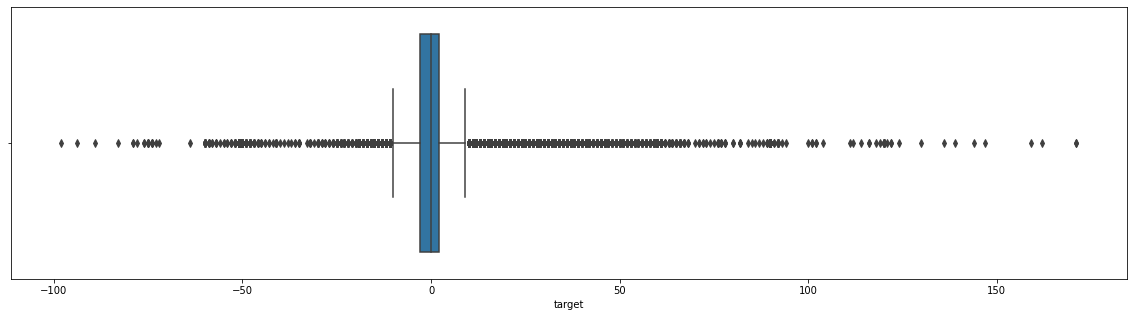

In [42]:
plt.subplots(figsize=(20,5))
sns.boxplot(data['target'])

In [43]:
# Creating a function for outliers
def fun(a):
    q1=a.quantile(0.25)
    q3=a.quantile(0.75)
    iqr=q3-q1
    low=q1-(1.5*iqr)
    high=q3+(1.5*iqr)
    a[a<low]=q1
    a[a>high]=q3
    return a

In [44]:
fun(data['target'])

19014    0
41980   -5
40830    4
43090    0
44689    2
        ..
28199    0
39288   -1
44982    0
10288   -1
45914    0
Name: target, Length: 39082, dtype: int32

In [45]:
data['target'].describe()

count    39082.000000
mean        -0.230925
std          3.246391
min        -10.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max          9.000000
Name: target, dtype: float64

## splitting

In [46]:
train_size=0.8 #dividing 80:10:10 for train:valid:test
x = data.drop(columns = ['target']).copy() #remaining dataframe
y = data['target'] 
#splitting into training and remaining (80/20)
x_train, x_rest, y_train, y_rest = train_test_split(x,y, train_size=0.8)
#splitting into valid and test (50/50) from remaining (20=>10/10)
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rest,y_rest, test_size=0.5)

In [47]:
print(x_train.shape), print(y_train.shape) #80%
print(x_valid.shape), print(y_valid.shape) #10%
print(x_test.shape), print(y_test.shape) #10%

(31265, 21)
(31265,)
(3908, 21)
(3908,)
(3909, 21)
(3909,)


(None, None)

## EDA

In [48]:
import seaborn as sns

In [49]:
data.describe()

,buisness_year,doc_id,document_create_date.1,document type,total_open_amount,target,posting_year,due_year,clear_year,posting_month,due_month,clear_month,posting_day,due_day,clear_day
count,39082.000000,3.908200e+04,3.908200e+04,39082.0,39082.000000,39082.000000,39082.000000,39082.000000,39082.000000,39082.000000,39082.000000,39082.000000,39082.000000,39082.000000,39082.000000
mean,2019.135715,2.012777e+09,2.019186e+07,1.0,26095.842908,-0.230925,2019.127143,2019.140397,2019.135715,5.708050,6.108874,6.191802,15.666778,15.910061,15.987437
std,0.342490,2.813156e+08,3.263773e+03,0.0,32261.701569,3.246391,0.341632,0.347845,0.342490,3.505598,3.475060,3.486016,8.760732,8.717051,8.916540
min,2019.000000,1.928488e+09,2.018123e+07,1.0,1.142100,-10.000000,2018.000000,2018.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2019.000000,1.929179e+09,2.019041e+07,1.0,3761.154000,-3.000000,2019.000000,2019.000000,2019.000000,2.000000,3.000000,3.000000,8.000000,8.000000,8.000000
50%,2019.000000,1.929732e+09,2.019072e+07,1.0,14030.876700,0.000000,2019.000000,2019.000000,2019.000000,5.000000,6.000000,6.000000,16.000000,16.000000,16.000000
75%,2019.000000,1.930212e+09,2.019103e+07,1.0,37506.845475,2.000000,2019.000000,2019.000000,2019.000000,9.000000,9.000000,9.000000,23.000000,24.000000,24.000000
max,2020.000000,9.500000e+09,2.020023e+07,1.0,497995.986600,9.000000,2020.000000,2020.000000,2020.000000,12.000000,12.000000,12.000000,31.000000,31.000000,31.000000


<AxesSubplot:xlabel='target', ylabel='Density'>

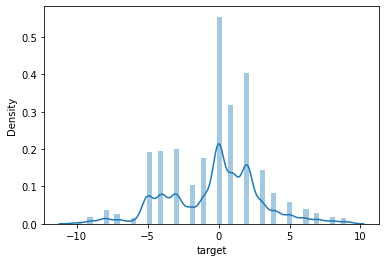

In [50]:
sns.distplot(y_train)
#no major skewness is observerd

<AxesSubplot:>

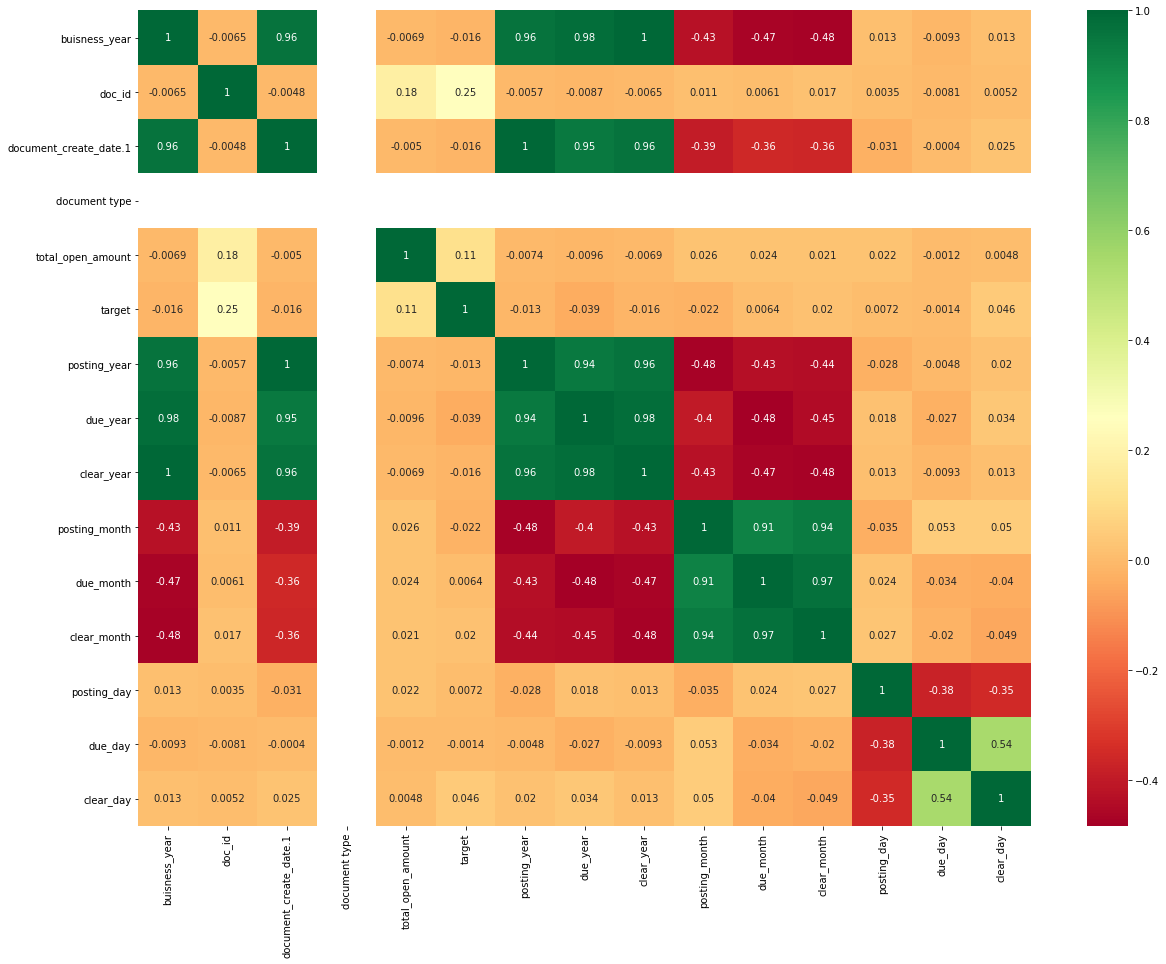

In [51]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
# no prominent correlations except years

In [52]:
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int32
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1             int64
due_in_date               datetime64[ns]
document type                      int64
total_open_amount                float64
cust_payment_terms                object
target                             int32
posting_year                       int64
due_year                           int64
clear_year                         int64
posting_month                      int64
due_month                          int64
clear_month                        int64
posting_day                        int64
due_day                            int64
clear_day                          int64
dtype: object

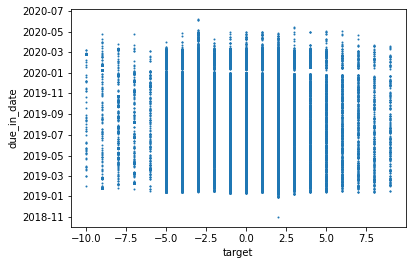

In [53]:
data.plot.scatter(x = 'target', y = 'due_in_date', s = 1);

<AxesSubplot:xlabel='target', ylabel='due_in_date'>

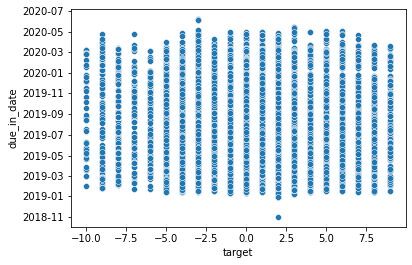

In [54]:
sns.scatterplot(data= x_train.merge(y_train,on = x_train.index), x="target", y="due_in_date")
#random distribution of variable 

## Feature Engineering

In [55]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31265 entries, 48938 to 20249
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           31265 non-null  object        
 1   cust_number             31265 non-null  object        
 2   name_customer           31265 non-null  object        
 3   clear_date              31265 non-null  datetime64[ns]
 4   buisness_year           31265 non-null  int32         
 5   doc_id                  31265 non-null  float64       
 6   posting_date            31265 non-null  datetime64[ns]
 7   document_create_date.1  31265 non-null  int64         
 8   due_in_date             31265 non-null  datetime64[ns]
 9   document type           31265 non-null  int64         
 10  total_open_amount       31265 non-null  float64       
 11  cust_payment_terms      31265 non-null  object        
 12  posting_year            31265 non-null  in

In [56]:
x_train.nunique()

business_code                 6
cust_number                1251
name_customer              3514
clear_date                  395
buisness_year                 2
doc_id                    31265
posting_date                423
document_create_date.1      423
due_in_date                 490
document type                 1
total_open_amount         28692
cust_payment_terms           64
posting_year                  3
due_year                      3
clear_year                    2
posting_month                12
due_month                    12
clear_month                  12
posting_day                  31
due_day                      31
clear_day                    31
dtype: int64

In [57]:
#dropping function 
def dropping(col , traindata= x_train, valdata= x_valid, testdata= x_test):
    traindata.drop(col, axis=1, inplace=True)
    valdata.drop(col, axis=1, inplace=True)
    testdata.drop(col, axis=1, inplace=True)
    return traindata,valdata,testdata

In [58]:
from sklearn.preprocessing import LabelEncoder
#encoding business_code 
buss_code_encoder= LabelEncoder()
buss_code_encoder.fit(x_train['business_code'])
x_train['business_code_encoded']= buss_code_encoder.transform(x_train['business_code'])
x_valid['business_code_encoded']= buss_code_encoder.transform(x_valid['business_code'])
x_test['business_code_encoded']= buss_code_encoder.transform(x_test['business_code'])

In [59]:
x_train,x_valid,x_test =dropping(['business_code'])

In [60]:
x_train['business_code_encoded'].nunique()
#still no hampering of data

6

In [61]:
#encoding cust_number
cust_no_encoder= LabelEncoder()
cust_no_encoder.fit(x_train['cust_number'])
x_train['cust_no_encoded']= cust_no_encoder.transform(x_train['cust_number'])
#for new customers in validation set
new_mem= set(x_valid['cust_number'])-set(cust_no_encoder.classes_)
for i in new_mem:
    cust_no_encoder.classes_ = np.append(cust_no_encoder.classes_, i)
x_valid['cust_no_encoded']= cust_no_encoder.transform(x_valid['cust_number'])
#for new customers in test set
new_mem= set(x_test['cust_number'])-set(cust_no_encoder.classes_)
for i in new_mem:
    cust_no_encoder.classes_ = np.append(cust_no_encoder.classes_, i)
x_test['cust_no_encoded']= cust_no_encoder.transform(x_test['cust_number'])

In [62]:
x_train,x_valid,x_test =dropping(['cust_number'])

In [63]:
x_train

,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,...,due_year,clear_year,posting_month,due_month,clear_month,posting_day,due_day,clear_day,business_code_encoded,cust_no_encoded
48938,WAL-MAR co,2019-03-19,2019,1.928917e+09,2019-03-08,20190308,2019-03-23,1,46145.9754,NAH4,...,2019,2019,3,3,3,8,23,19,1,758
8694,J corporation,2019-07-18,2019,1.929549e+09,2019-07-03,20190703,2019-07-18,1,8829.2592,NAA8,...,2019,2019,7,7,7,3,18,18,1,1192
38561,PUBLI systems,2020-01-29,2020,1.930396e+09,2020-01-14,20200114,2020-01-29,1,543.0888,NAA8,...,2020,2020,1,1,1,14,29,29,1,625
43739,WAL-MAR llc,2019-12-24,2019,1.930257e+09,2019-12-12,20191212,2019-12-27,1,3482.7246,NAH4,...,2019,2019,12,12,12,12,27,24,1,758
13158,WAL-MAR foundation,2019-07-19,2019,1.929585e+09,2019-07-07,20190707,2019-07-22,1,21092.3028,NAH4,...,2019,2019,7,7,7,7,22,19,1,758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21207,WAL-MAR trust,2020-02-05,2020,1.930442e+09,2020-01-26,20200126,2020-02-10,1,56496.3174,NAH4,...,2020,2020,1,2,2,26,10,5,1,758
33664,DEC llc,2019-03-18,2019,1.928915e+09,2019-03-06,20190306,2019-03-24,1,25.5636,NAM4,...,2019,2019,3,3,3,6,24,18,1,505
5687,WAL-MAR corp,2019-02-07,2019,1.928698e+09,2019-01-28,20190128,2019-02-12,1,37168.6968,NAH4,...,2019,2019,1,2,2,28,12,7,1,758
44037,BI corp,2019-03-25,2019,1.928943e+09,2019-03-11,20190311,2019-03-26,1,7817.8932,NAA8,...,2019,2019,3,3,3,11,26,25,1,43


In [64]:
#encoding cust_payment_terms
cust_payment_terms_encoder= LabelEncoder()
cust_payment_terms_encoder.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_encoded']= cust_payment_terms_encoder.transform(x_train['cust_payment_terms'])
#for new customers in validation set
new_mem= set(x_valid['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for i in new_mem:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_, i)
x_valid['cust_payment_terms_encoded']= cust_payment_terms_encoder.transform(x_valid['cust_payment_terms'])
#for new customers in test set
new_mem= set(x_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for i in new_mem:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_, i)
x_test['cust_payment_terms_encoded']= cust_payment_terms_encoder.transform(x_test['cust_payment_terms'])

In [65]:
x_train,x_valid,x_test =dropping(['cust_payment_terms'])

In [66]:
#encoding document type
#document_type_encoder= LabelEncoder()
#document_type_encoder.fit(x_train['document type'])
#x_train['document_type_encoded']= document_type_encoder.transform(x_train['document type'])
#x_valid['document_type_encoded']= document_type_encoder.transform(x_valid['document type'])
#x_test['document_type_encoded']= document_type_encoder.transform(x_test['document type'])

In [67]:
#x_train,x_valid,x_test =dropping(['document type'])

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31265 entries, 48938 to 20249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name_customer               31265 non-null  object        
 1   clear_date                  31265 non-null  datetime64[ns]
 2   buisness_year               31265 non-null  int32         
 3   doc_id                      31265 non-null  float64       
 4   posting_date                31265 non-null  datetime64[ns]
 5   document_create_date.1      31265 non-null  int64         
 6   due_in_date                 31265 non-null  datetime64[ns]
 7   document type               31265 non-null  int64         
 8   total_open_amount           31265 non-null  float64       
 9   posting_year                31265 non-null  int64         
 10  due_year                    31265 non-null  int64         
 11  clear_year                  31265 non-null  int64 

In [69]:
y_test.dtype , y_train.dtype

(dtype('int32'), dtype('int32'))

In [70]:
#encoding name_customer
name_customer_encoder= LabelEncoder()
name_customer_encoder.fit(x_train['name_customer'])
x_train['name_customer_encoded']= name_customer_encoder.transform(x_train['name_customer'])
#for new customers in validation set
new_mem= set(x_valid['name_customer'])-set(name_customer_encoder.classes_)
for i in new_mem:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_, i)
x_valid['name_customer_encoded']= name_customer_encoder.transform(x_valid['name_customer'])
#for new customers in test set
new_mem= set(x_test['name_customer'])-set(name_customer_encoder.classes_)
for i in new_mem:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_, i)
x_test['name_customer_encoded']= name_customer_encoder.transform(x_test['name_customer'])

In [71]:
x_train,x_valid,x_test =dropping(['name_customer'])

In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31265 entries, 48938 to 20249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   clear_date                  31265 non-null  datetime64[ns]
 1   buisness_year               31265 non-null  int32         
 2   doc_id                      31265 non-null  float64       
 3   posting_date                31265 non-null  datetime64[ns]
 4   document_create_date.1      31265 non-null  int64         
 5   due_in_date                 31265 non-null  datetime64[ns]
 6   document type               31265 non-null  int64         
 7   total_open_amount           31265 non-null  float64       
 8   posting_year                31265 non-null  int64         
 9   due_year                    31265 non-null  int64         
 10  clear_year                  31265 non-null  int64         
 11  posting_month               31265 non-null  int64 

In [73]:
#droping the datetime64 data type columns as their data has already been extracted
x_train,x_valid,x_test =dropping(['clear_date'])
x_train,x_valid,x_test =dropping(['posting_date'])
x_train,x_valid,x_test =dropping(['due_in_date'])

# Model Bulding

#### test model 

In [74]:
#testing model
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [75]:
#training model
classifier.fit(x_train,y_train)

[01:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
#prediction on validation data
y_pred=classifier.predict(x_valid)

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [78]:
#accuracy
accuracy_score(y_valid,y_pred)

0.9339815762538383

#### model selection

In [79]:
#testing other models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [80]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

for model in models:
    model.fit(x_train, y_train)

[01:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest",
    "               XGBoost"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(x_test, y_test) * 100))

   Logistic Regression: 21.2331%
Support Vector Machine: 21.2331%
         Decision Tree: 44.6406%
        Neural Network: 3.2745%
         Random Forest: 62.5480%
               XGBoost: 93.1184%


### Final Testing

In [82]:
#XGBoost provides the best accuracy

#predicting on test set 
y_pred=classifier.predict(x_test)

In [83]:
#accuracy
accuracy_score(y_test,y_pred)

0.9311844461499105

## ML Model is been created : )

In [84]:
# filling up the clear_date columns' null values with the help of created predictive model